In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score,train_test_split,RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import GridSearchCV, ParameterGrid
import time as time

import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
def mase(actual, forecast):
    n = len(actual)
    numerator = np.mean(np.abs(actual - forecast))
    denominator = np.mean(np.abs(np.diff(actual)))
    return numerator / denominator

In [3]:
covid_df = pd.read_csv('nc_multi_df.csv', parse_dates=['Date'])
covid_df.drop(columns = ['PROVINCE_STATE_NAME'], inplace = True)
covid_df = covid_df.rename(columns={'Date': 'ds', 'PEOPLE_POSITIVE_NEW_CASES_COUNT': 'y'})
covid_df.set_index('ds', inplace=True)

train_size = int(len(covid_df)* 0.85)
covid_train, covid_test = covid_df[0:train_size], covid_df[train_size:]

In [4]:
covid_train = covid_train[[ 'y', 'new_cases_7_lag', 'new_deaths_30_lag', 'new_deaths_1_lag', 'new_cases_4_lag', 'dew_point', 'new_cases_1 lag', 'new_deaths_3_lag', 'new_cases_10_mean', 'relative_humidity', 'new_cases_3_lag', 'new_cases_10_max', 'new_deaths_2_lag', 'new_deaths_100_std', 'new_deaths_7_lag', 'new_cases_10_std', 'new_cases_2_lag', 'new_deaths_4_lag', 'new_hospitalized_patients', 'PEOPLE_DEATH_NEW_COUNT', 'new_deaths_50_lag', 'average_temperature_celsius', 'new_cases_150_lag', 'new_cases_10_min', 'new_cases_50_std', 'current_intensive_care_patients']]
covid_test = covid_test[['y', 'new_cases_7_lag', 'new_deaths_30_lag', 'new_deaths_1_lag', 'new_cases_4_lag', 'dew_point', 'new_cases_1 lag', 'new_deaths_3_lag', 'new_cases_10_mean', 'relative_humidity', 'new_cases_3_lag', 'new_cases_10_max', 'new_deaths_2_lag', 'new_deaths_100_std', 'new_deaths_7_lag', 'new_cases_10_std', 'new_cases_2_lag', 'new_deaths_4_lag', 'new_hospitalized_patients', 'PEOPLE_DEATH_NEW_COUNT', 'new_deaths_50_lag', 'average_temperature_celsius', 'new_cases_150_lag', 'new_cases_10_min', 'new_cases_50_std', 'current_intensive_care_patients']]

In [5]:
X_train = covid_train.drop(columns=['y'], axis=1)
y_train = covid_train['y']
X_test = covid_test.drop(columns=['y'], axis=1)
y_test = covid_test['y']

In [6]:
reg_model = xgb.XGBRegressor(learning_rate=0.01,n_estimators=10000, early_stopping_rounds=10)
reg_model.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)], 
       verbose=True)

[0]	validation_0-rmse:4116.51494	validation_1-rmse:18999.58357
[1]	validation_0-rmse:4081.10266	validation_1-rmse:18952.59101
[2]	validation_0-rmse:4046.04612	validation_1-rmse:18906.08236
[3]	validation_0-rmse:4011.34215	validation_1-rmse:18860.05140
[4]	validation_0-rmse:3976.98741	validation_1-rmse:18814.48923
[5]	validation_0-rmse:3942.98050	validation_1-rmse:18772.47504
[6]	validation_0-rmse:3909.13981	validation_1-rmse:18719.71045
[7]	validation_0-rmse:3875.62422	validation_1-rmse:18667.48181
[8]	validation_0-rmse:3842.44436	validation_1-rmse:18615.77517
[9]	validation_0-rmse:3809.60999	validation_1-rmse:18564.56244
[10]	validation_0-rmse:3777.08498	validation_1-rmse:18522.33005
[11]	validation_0-rmse:3744.88520	validation_1-rmse:18480.53802
[12]	validation_0-rmse:3713.00601	validation_1-rmse:18439.19090
[13]	validation_0-rmse:3681.44530	validation_1-rmse:18398.27440
[14]	validation_0-rmse:3650.19780	validation_1-rmse:18357.83996
[15]	validation_0-rmse:3619.26177	validation_1-rms

[128]	validation_0-rmse:1474.23188	validation_1-rmse:15824.70645
[129]	validation_0-rmse:1463.35432	validation_1-rmse:15805.50029
[130]	validation_0-rmse:1453.06592	validation_1-rmse:15785.02008
[131]	validation_0-rmse:1442.29728	validation_1-rmse:15775.55916
[132]	validation_0-rmse:1431.70530	validation_1-rmse:15756.79174
[133]	validation_0-rmse:1421.13821	validation_1-rmse:15747.47472
[134]	validation_0-rmse:1411.19988	validation_1-rmse:15727.85595
[135]	validation_0-rmse:1400.83490	validation_1-rmse:15718.71969
[136]	validation_0-rmse:1391.07821	validation_1-rmse:15699.24240
[137]	validation_0-rmse:1380.95787	validation_1-rmse:15681.18096
[138]	validation_0-rmse:1370.86604	validation_1-rmse:15672.30766
[139]	validation_0-rmse:1360.92480	validation_1-rmse:15654.53237
[140]	validation_0-rmse:1351.48009	validation_1-rmse:15635.59153
[141]	validation_0-rmse:1341.66316	validation_1-rmse:15626.94430
[142]	validation_0-rmse:1331.95087	validation_1-rmse:15618.38964
[143]	validation_0-rmse:1

[256]	validation_0-rmse:650.13515	validation_1-rmse:14513.13663
[257]	validation_0-rmse:646.50773	validation_1-rmse:14502.95946
[258]	validation_0-rmse:643.33962	validation_1-rmse:14492.89231
[259]	validation_0-rmse:640.05824	validation_1-rmse:14482.92651
[260]	validation_0-rmse:636.55791	validation_1-rmse:14473.02002
[261]	validation_0-rmse:633.33451	validation_1-rmse:14463.20394
[262]	validation_0-rmse:630.24664	validation_1-rmse:14453.47437
[263]	validation_0-rmse:626.79893	validation_1-rmse:14443.82022
[264]	validation_0-rmse:623.71314	validation_1-rmse:14434.23780
[265]	validation_0-rmse:620.64262	validation_1-rmse:14424.72816
[266]	validation_0-rmse:617.62870	validation_1-rmse:14415.31100
[267]	validation_0-rmse:614.59628	validation_1-rmse:14405.97646
[268]	validation_0-rmse:611.30562	validation_1-rmse:14396.73903
[269]	validation_0-rmse:608.03696	validation_1-rmse:14387.58002
[270]	validation_0-rmse:605.10172	validation_1-rmse:14378.46890
[271]	validation_0-rmse:601.87835	valida

[385]	validation_0-rmse:363.03899	validation_1-rmse:13653.29387
[386]	validation_0-rmse:361.77481	validation_1-rmse:13649.11313
[387]	validation_0-rmse:360.46898	validation_1-rmse:13644.95059
[388]	validation_0-rmse:359.20776	validation_1-rmse:13640.83349
[389]	validation_0-rmse:358.02929	validation_1-rmse:13636.75048
[390]	validation_0-rmse:356.82384	validation_1-rmse:13632.67994
[391]	validation_0-rmse:355.66654	validation_1-rmse:13628.65265
[392]	validation_0-rmse:354.40486	validation_1-rmse:13624.63940
[393]	validation_0-rmse:353.21130	validation_1-rmse:13620.64465
[394]	validation_0-rmse:352.01202	validation_1-rmse:13616.68946
[395]	validation_0-rmse:350.84660	validation_1-rmse:13612.75039
[396]	validation_0-rmse:349.64050	validation_1-rmse:13608.85151
[397]	validation_0-rmse:348.49170	validation_1-rmse:13604.96784
[398]	validation_0-rmse:347.33513	validation_1-rmse:13601.11140
[399]	validation_0-rmse:346.22853	validation_1-rmse:13597.28907
[400]	validation_0-rmse:345.09714	valida

[514]	validation_0-rmse:251.57807	validation_1-rmse:13313.10794
[515]	validation_0-rmse:250.75860	validation_1-rmse:13311.63285
[516]	validation_0-rmse:250.29268	validation_1-rmse:13310.19899
[517]	validation_0-rmse:249.54996	validation_1-rmse:13308.29809
[518]	validation_0-rmse:248.66176	validation_1-rmse:13306.84722
[519]	validation_0-rmse:247.85515	validation_1-rmse:13305.40369
[520]	validation_0-rmse:247.12936	validation_1-rmse:13303.53614
[521]	validation_0-rmse:246.67922	validation_1-rmse:13302.14415
[522]	validation_0-rmse:245.78809	validation_1-rmse:13300.72456
[523]	validation_0-rmse:245.30565	validation_1-rmse:13299.34121
[524]	validation_0-rmse:244.59820	validation_1-rmse:13297.51472
[525]	validation_0-rmse:244.11822	validation_1-rmse:13296.15355
[526]	validation_0-rmse:243.64809	validation_1-rmse:13294.79487
[527]	validation_0-rmse:243.18530	validation_1-rmse:13293.44368
[528]	validation_0-rmse:242.49505	validation_1-rmse:13291.65800
[529]	validation_0-rmse:242.03824	valida

[643]	validation_0-rmse:196.56600	validation_1-rmse:13161.81272
[644]	validation_0-rmse:196.39716	validation_1-rmse:13161.08103
[645]	validation_0-rmse:196.23334	validation_1-rmse:13160.17502
[646]	validation_0-rmse:195.72696	validation_1-rmse:13159.44971
[647]	validation_0-rmse:195.55745	validation_1-rmse:13158.55513
[648]	validation_0-rmse:195.21384	validation_1-rmse:13157.84122
[649]	validation_0-rmse:194.80587	validation_1-rmse:13157.12979
[650]	validation_0-rmse:194.64747	validation_1-rmse:13156.25004
[651]	validation_0-rmse:194.24589	validation_1-rmse:13155.54469
[652]	validation_0-rmse:194.09013	validation_1-rmse:13154.67278
[653]	validation_0-rmse:193.59643	validation_1-rmse:13153.97482
[654]	validation_0-rmse:193.12214	validation_1-rmse:13153.28091
[655]	validation_0-rmse:192.96034	validation_1-rmse:13152.42468
[656]	validation_0-rmse:192.66871	validation_1-rmse:13151.74123
[657]	validation_0-rmse:192.18444	validation_1-rmse:13151.13020
[658]	validation_0-rmse:191.99989	valida

[772]	validation_0-rmse:164.97531	validation_1-rmse:13088.33723
[773]	validation_0-rmse:164.78174	validation_1-rmse:13087.87502
[774]	validation_0-rmse:164.48455	validation_1-rmse:13087.51350
[775]	validation_0-rmse:164.41238	validation_1-rmse:13087.19334
[776]	validation_0-rmse:164.24167	validation_1-rmse:13086.73728
[777]	validation_0-rmse:164.11272	validation_1-rmse:13086.41150
[778]	validation_0-rmse:163.94999	validation_1-rmse:13085.95472
[779]	validation_0-rmse:163.71817	validation_1-rmse:13085.59786
[780]	validation_0-rmse:163.64797	validation_1-rmse:13085.28564
[781]	validation_0-rmse:163.35780	validation_1-rmse:13084.84639
[782]	validation_0-rmse:163.28864	validation_1-rmse:13084.53739
[783]	validation_0-rmse:163.08003	validation_1-rmse:13084.17979
[784]	validation_0-rmse:162.87740	validation_1-rmse:13083.87367
[785]	validation_0-rmse:162.69040	validation_1-rmse:13083.42468
[786]	validation_0-rmse:162.50687	validation_1-rmse:13082.97801
[787]	validation_0-rmse:162.34899	valida

[901]	validation_0-rmse:142.52927	validation_1-rmse:13050.77375
[902]	validation_0-rmse:142.21705	validation_1-rmse:13050.61451
[903]	validation_0-rmse:142.02478	validation_1-rmse:13050.42384
[904]	validation_0-rmse:141.73046	validation_1-rmse:13050.29002
[905]	validation_0-rmse:141.38551	validation_1-rmse:13050.20857
[906]	validation_0-rmse:141.32524	validation_1-rmse:13050.02211
[907]	validation_0-rmse:141.03624	validation_1-rmse:13049.84250
[908]	validation_0-rmse:140.69227	validation_1-rmse:13049.68015
[909]	validation_0-rmse:140.53295	validation_1-rmse:13049.68575
[910]	validation_0-rmse:140.42890	validation_1-rmse:13049.50562
[911]	validation_0-rmse:140.09393	validation_1-rmse:13049.43141
[912]	validation_0-rmse:139.99515	validation_1-rmse:13049.25321
[913]	validation_0-rmse:139.93651	validation_1-rmse:13049.07389
[914]	validation_0-rmse:139.64083	validation_1-rmse:13048.93138
[915]	validation_0-rmse:139.47508	validation_1-rmse:13048.92709
[916]	validation_0-rmse:139.10693	valida

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

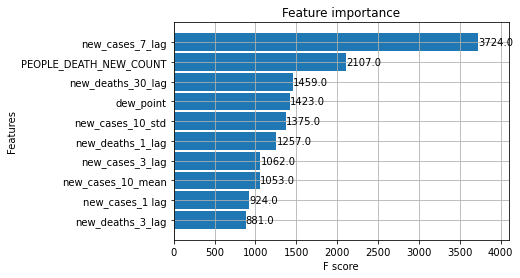

In [7]:
_ = plot_importance(reg_model, height=0.9 ,max_num_features = 10)

<AxesSubplot:xlabel='ds'>

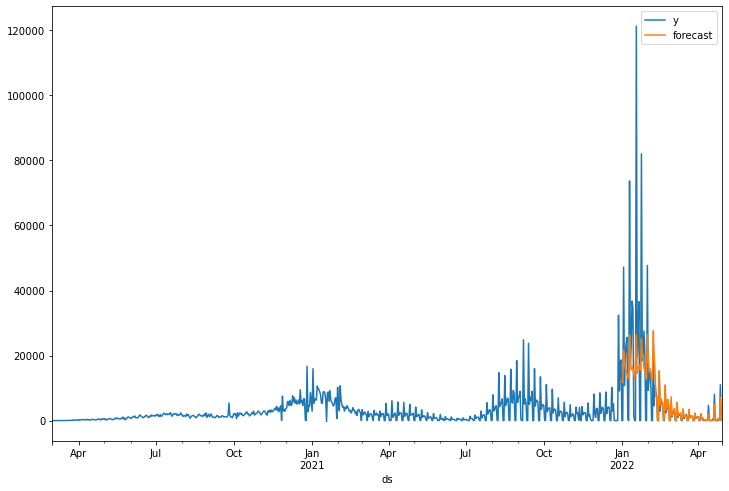

In [8]:
covid_test['forecast'] = reg_model.predict(X_test)

prophet_df_multi = pd.DataFrame(covid_df)

prophet_df_multi['forecast']=covid_test['forecast']

prophet_df_multi[['y', 'forecast']].plot(figsize=(12,8))

<AxesSubplot:xlabel='ds'>

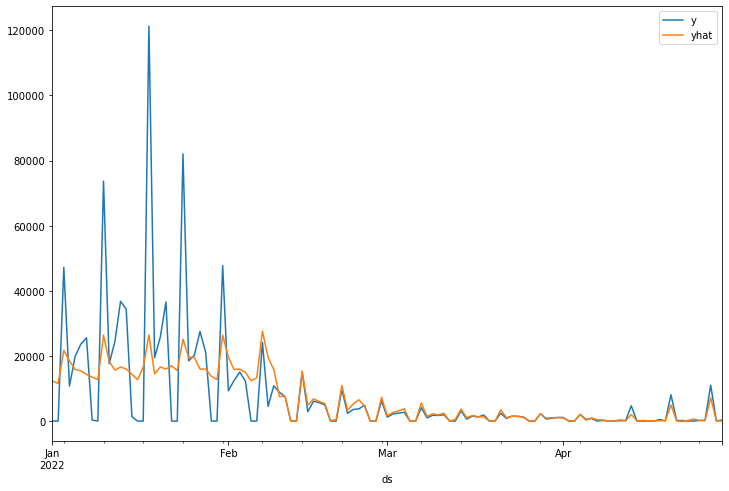

In [9]:
graph_df = pd.DataFrame(covid_test)
graph_df['yhat'] = covid_test['forecast'].values
graph_df[['y','yhat']].plot(figsize=(12,8))

In [10]:
model_rmse = mean_squared_error(covid_test['y'], covid_test['forecast'], squared=False)
model_mae = mean_absolute_error(covid_test['y'], covid_test['forecast'])
print('Test RMSE: ', model_rmse)
print('Test MAE: ', model_mae)
print('MASE = ', mase(covid_test['y'], covid_test['forecast']))

Test RMSE:  13047.957065199458
Test MAE:  5328.842531345472
MASE =  0.5726812307650241


In [11]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits = 5, test_size = 100, gap = 1)
covid_df = covid_df.sort_index()

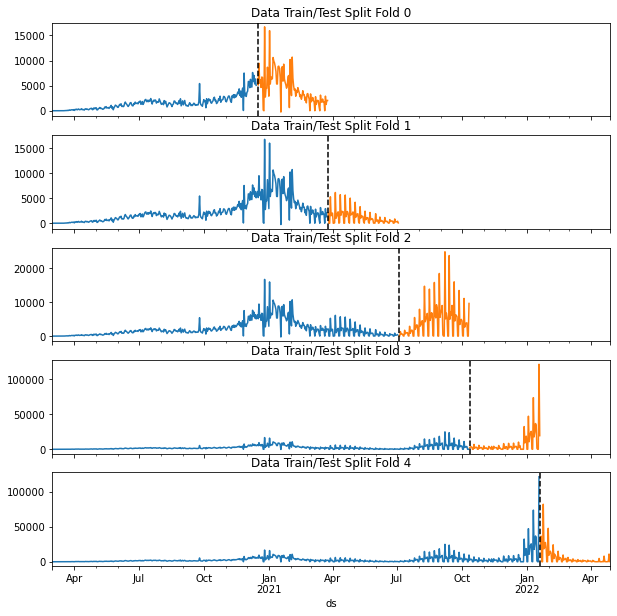

In [12]:
fig, axs = plt.subplots(5, 1, figsize=(10, 10), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(covid_df):
    train = covid_df.iloc[train_idx]
    test = covid_df.iloc[val_idx]
    train['y'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}')
    test['y'].plot(ax=axs[fold],
                         label='Test Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold += 1
plt.show()

In [13]:
tss = TimeSeriesSplit(n_splits=5, test_size=100, gap=1)
covid_df = covid_df.sort_index()


fold = 0
preds = []
scores = []
for train_idx, val_idx in tss.split(covid_df):
    train = covid_df.iloc[train_idx]
    test = covid_df.iloc[val_idx]
    TARGET = 'y'

    reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                           n_estimators=1000,
                           early_stopping_rounds=20,
                           objective='reg:linear',
                           max_depth=3,
                           learning_rate=0.01)
    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)

    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)  

[00:50:57] WARNING: c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4118.03509	validation_1-rmse:19000.01782
[100]	validation_0-rmse:2004.10898	validation_1-rmse:16284.55346
[200]	validation_0-rmse:1204.45525	validation_1-rmse:14997.79645
[300]	validation_0-rmse:879.01503	validation_1-rmse:14424.38244
[400]	validation_0-rmse:750.78559	validation_1-rmse:13927.43733
[500]	validation_0-rmse:662.31646	validation_1-rmse:13697.91383
[600]	validation_0-rmse:597.06322	validation_1-rmse:13568.28850
[700]	validation_0-rmse:545.99815	validation_1-rmse:13455.54747
[800]	validation_0-rmse:506.51318	validation_1-rmse:13395.14640
[900]	validation_0-rmse:476.05172	validation_1-rmse:13352.03120
[999]	validation_0-rmse:451.88848	validation_1-rmse:13327.15422
[00:50:59] WARNING: c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\objective\regression_obj.cu:213: reg:

<AxesSubplot:xlabel='ds'>

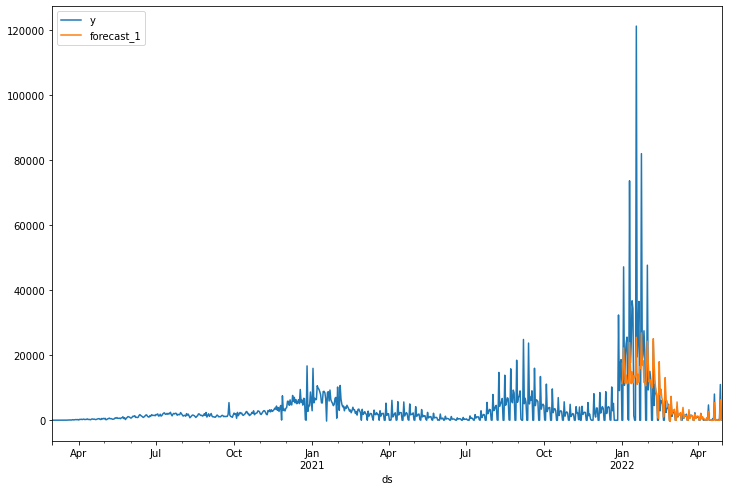

In [14]:
covid_test['forecast_1'] = reg.predict(X_test)

prophet_df_multi = pd.DataFrame(covid_df)

prophet_df_multi['forecast_1']=covid_test['forecast_1']

prophet_df_multi[['y', 'forecast_1']].plot(figsize=(12,8))

<AxesSubplot:xlabel='ds'>

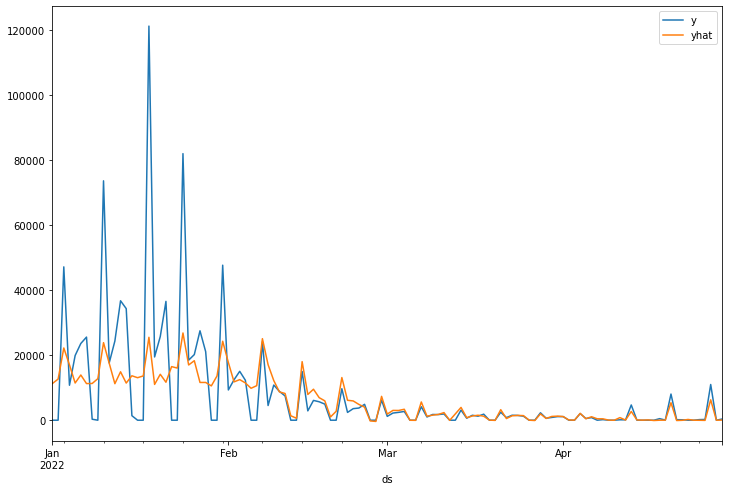

In [15]:
graph_df = pd.DataFrame(covid_test)
graph_df['yhat'] = covid_test['forecast_1'].values
graph_df[['y','yhat']].plot(figsize=(12,8))

In [16]:
model_rmse = mean_squared_error(covid_test['y'], covid_test['forecast'], squared=False)
model_mae = mean_absolute_error(covid_test['y'], covid_test['forecast'])
print('Test RMSE: ', model_rmse)
print('Test MAE: ', model_mae)
print('MASE = ', mase(covid_test['y'], covid_test['forecast']))

Test RMSE:  13047.957065199458
Test MAE:  5328.842531345472
MASE =  0.5726812307650241
